<a href="https://colab.research.google.com/github/yashmith-r/Banking-Data-Analysis/blob/main/Banking_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset

In [820]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("banking_data.csv")
print(df.head(10))

   age           job   marital marital_status  education default  balance  \
0   58    management   married        married   tertiary      no     2143   
1   44    technician    single         single  secondary      no       29   
2   33  entrepreneur   married        married  secondary      no        2   
3   47   blue-collar   married        married    unknown      no     1506   
4   33       unknown    single         single    unknown      no        1   
5   35    management   married        married   tertiary      no      231   
6   28    management    single         single   tertiary      no      447   
7   42  entrepreneur  divorced       divorced   tertiary     yes        2   
8   58       retired   married        married    primary      no      121   
9   43    technician    single         single  secondary      no      593   

  housing loan  contact  day month day_month  duration  campaign  pdays  \
0     yes   no  unknown    5   may     5-May       261         1     -1   
1 

Missing Values Check.

In [821]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


As there are one missing values, we can drop them

In [822]:
df = df.dropna()

In [823]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
age               0
job               0
marital           0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


Checking for any Duplicates

In [824]:
un = df.nunique()
print(un)

age                 77
job                 12
marital              3
marital_status       3
education            4
default              2
balance           7168
housing              2
loan                 2
contact              3
day                 31
month               12
day_month          318
duration          1573
campaign            48
pdays              559
previous            41
poutcome             4
y                    2
dtype: int64


In [825]:
# As marital &  marital_status have same unique values they can be duplicate rows
#day, month & day_month can be duplicate rows as well

In [826]:
print(df['marital'].value_counts())
print(df['marital_status'].value_counts())
#both are redundant

marital
married     27216
single      12787
divorced     5207
Name: count, dtype: int64
marital_status
married     27216
single      12787
divorced     5207
Name: count, dtype: int64


In [827]:
gf = df.groupby(['y','marital'])['marital'].count()
print(gf)
gf = df.groupby(['y','marital_status'])['marital_status'].count()
print(gf)

y    marital 
no   divorced     4584
     married     24458
     single      10875
yes  divorced      623
     married      2758
     single       1912
Name: marital, dtype: int64
y    marital_status
no   divorced           4584
     married           24458
     single            10875
yes  divorced            623
     married            2758
     single             1912
Name: marital_status, dtype: int64


In [828]:
gf = df.groupby(['y','day'])['day'].count()
print(gf)
gf = df.groupby(['y','month'])['month'].count()
print(gf)
gf = df.groupby(['y','day_month'])['day_month'].count()
print(gf)

y    day
no   1       232
     2      1111
     3       901
     4      1215
     5      1695
            ... 
yes  27      150
     28      143
     29      129
     30      271
     31       46
Name: day, Length: 62, dtype: int64
y    month
no   apr       2355
     aug       5559
     dec        114
     feb       2208
     jan       1261
     jul       6268
     jun       4795
     mar        229
     may      12841
     nov       3565
     oct        412
     sep        310
yes  apr        577
     aug        688
     dec        100
     feb        441
     jan        142
     jul        627
     jun        546
     mar        248
     may        925
     nov        407
     oct        323
     sep        269
Name: month, dtype: int64
y    day_month
no   1-Apr        34
     1-Aug         1
     1-Feb         6
     1-Jul        63
     1-Jun        67
                  ..
yes  9-Mar        18
     9-May        12
     9-Nov        17
     9-Oct         2
     9-Sep        26
Name:

In [829]:
df.drop(columns=['marital'],inplace = True)

In [830]:
df.drop(columns=['day_month'],inplace = True)

In [831]:
print(df.columns)

Index(['age', 'job', 'marital_status', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


Encoding the data

In [832]:
from sklearn.preprocessing import LabelEncoder

binary_columns = ['default', 'housing', 'loan', 'y']
label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df.head())

   age           job marital_status  education  default  balance  housing  \
0   58    management        married   tertiary        0     2143        1   
1   44    technician         single  secondary        0       29        1   
2   33  entrepreneur        married  secondary        0        2        1   
3   47   blue-collar        married    unknown        0     1506        1   
4   33       unknown         single    unknown        0        1        0   

   loan  contact  day month  duration  campaign  pdays  previous poutcome  y  
0     0  unknown    5   may       261         1     -1         0  unknown  0  
1     0  unknown    5   may       151         1     -1         0  unknown  0  
2     1  unknown    5   may        76         1     -1         0  unknown  0  
3     0  unknown    5   may        92         1     -1         0  unknown  0  
4     0  unknown    5   may       198         1     -1         0  unknown  0  


Comparsion based on Questions

Questions:
What is the distribution of age among the clients?

Max Age:  95
Min Age:  18


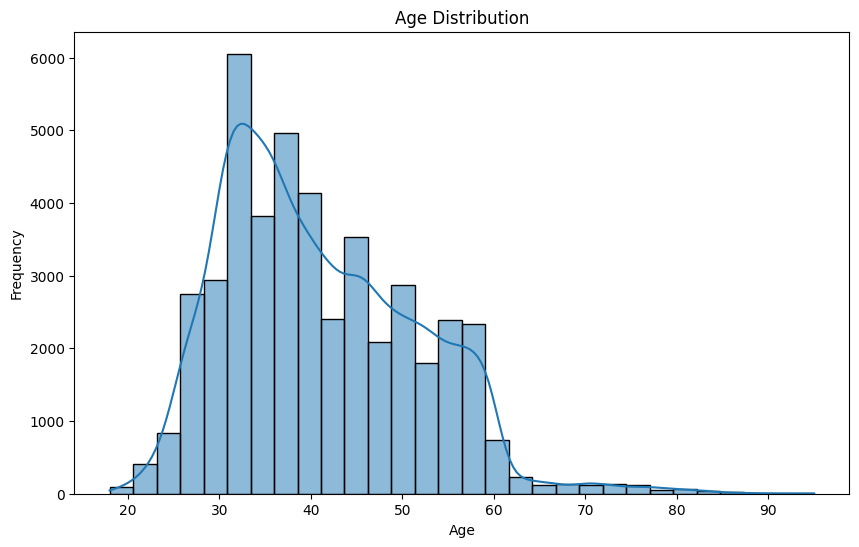

In [833]:
import seaborn as sns
print("Max Age: ",df['age'].max())
print("Min Age: ",df['age'].min())
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Questions: How does the job type vary among the clients?


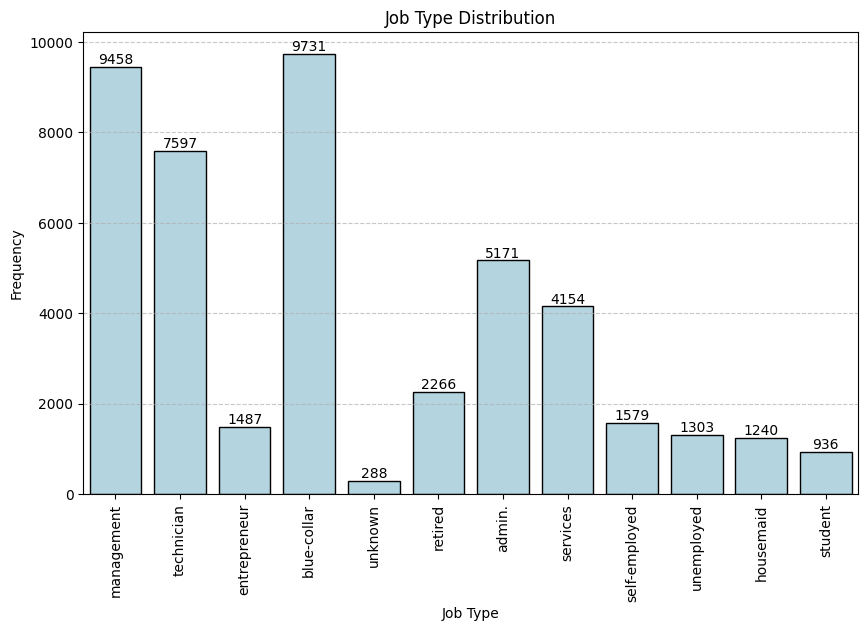

In [834]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='job', color='lightblue', edgecolor='k')
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                fontsize=10,
                color='black')
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Questions: What is the marital status distribution of the clients?


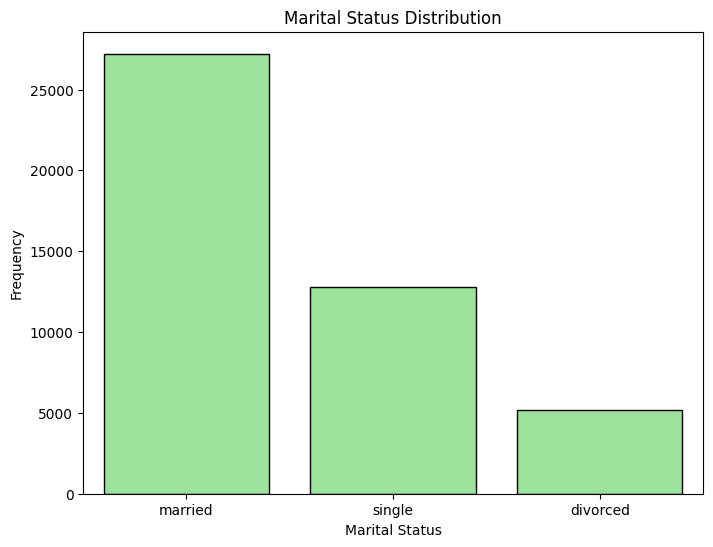

In [835]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='marital_status', color='lightgreen', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

Questions: What is the level of education among the clients?


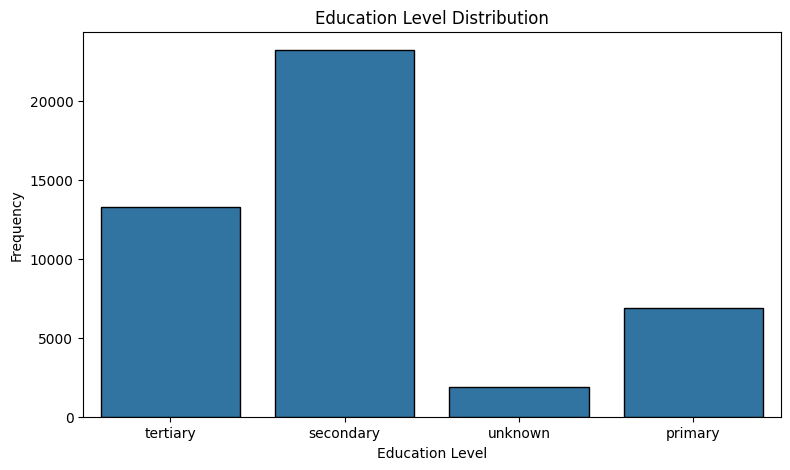

In [836]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='education', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

Questions: What proportion of clients have credit in default?


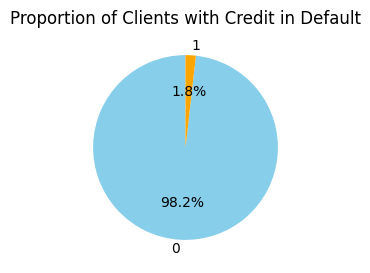

In [837]:
plt.figure(figsize=(5, 3))
df['default'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Proportion of Clients with Credit in Default')
plt.ylabel('')
plt.show()

Plot 6:​ What is the distribution of average yearly balance among the clients?​

In [838]:
x = df['balance'].describe()
print(x)

count     45210.000000
mean       1362.333024
std        3044.781647
min       -8019.000000
25%          72.000000
50%         448.500000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


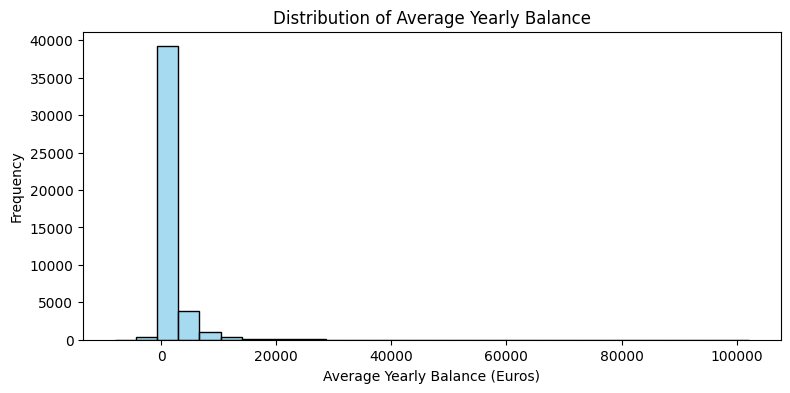

In [839]:
plt.figure(figsize=(9, 4))
sns.histplot(df['balance'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Average Yearly Balance (Euros)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-840-45acad25c1e7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job', y='balance', palette='Set2')


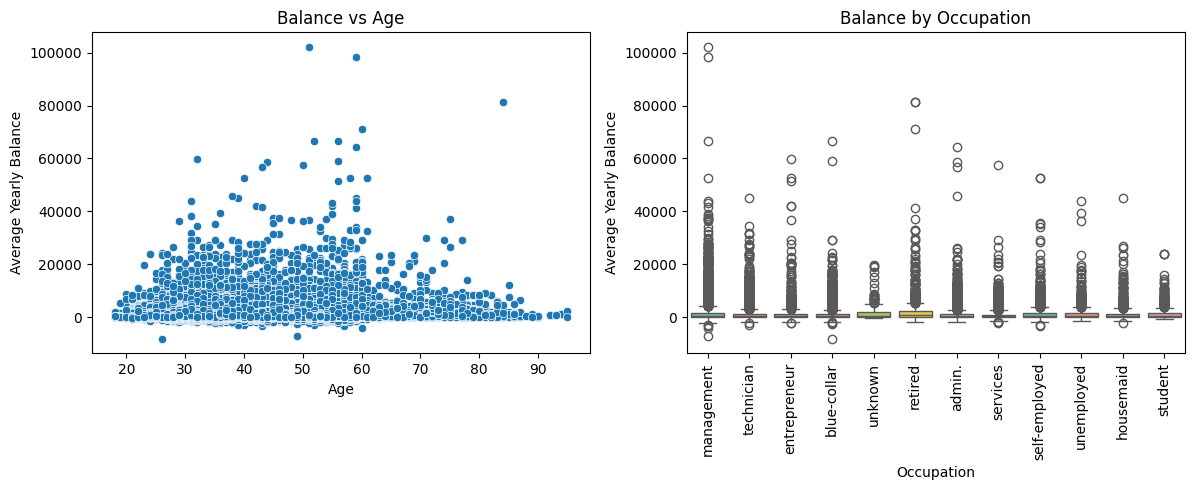

Correlation Matrix:
              age   balance
age      1.000000  0.097797
balance  0.097797  1.000000


In [840]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='age', y='balance', edgecolor='w')
plt.title('Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Average Yearly Balance')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='job', y='balance', palette='Set2')
plt.title('Balance by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Yearly Balance')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

correlation_matrix = df[['age', 'balance']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Questions: How many clients have housing loans?



<ipython-input-841-82adde23bd54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='housing', edgecolor='w', palette='Set2')


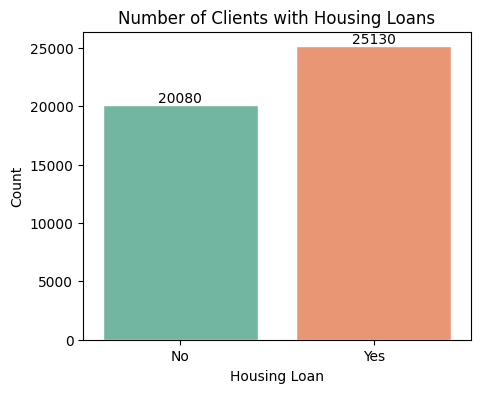

Clients with personal loans:  25130


In [841]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='housing', edgecolor='w', palette='Set2')
plt.title('Number of Clients with Housing Loans')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom')
plt.show()

print("Clients with personal loans: ", df[df['housing'] == 1].shape[0])

Questions: How many clients have personal loans?

<ipython-input-842-d44180e420d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='loan', edgecolor='w', palette='Set3')


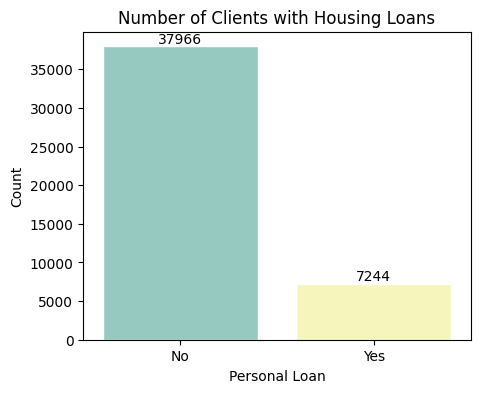

Clients with personal loans:  7244


In [842]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='loan', edgecolor='w', palette='Set3')
plt.title('Number of Clients with Housing Loans')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom')
plt.show()

print("Clients with personal loans: ", df[df['loan'] == 1].shape[0])

Questions: What are the communication types used for contacting clients during the campaign?

In [843]:
print(df['contact'].unique())
print(df['contact'].value_counts())

['unknown' 'cellular' 'telephone']
contact
cellular     29288
unknown      13020
telephone     2902
Name: count, dtype: int64


Plot 10:​
What is the distribution of the last contact day of the month?​

In [844]:
print(df['day'].describe())
print(df['month'].describe())

count    45210.000000
mean        15.806923
std          8.322310
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
count     45210
unique       12
top         may
freq      13766
Name: month, dtype: object


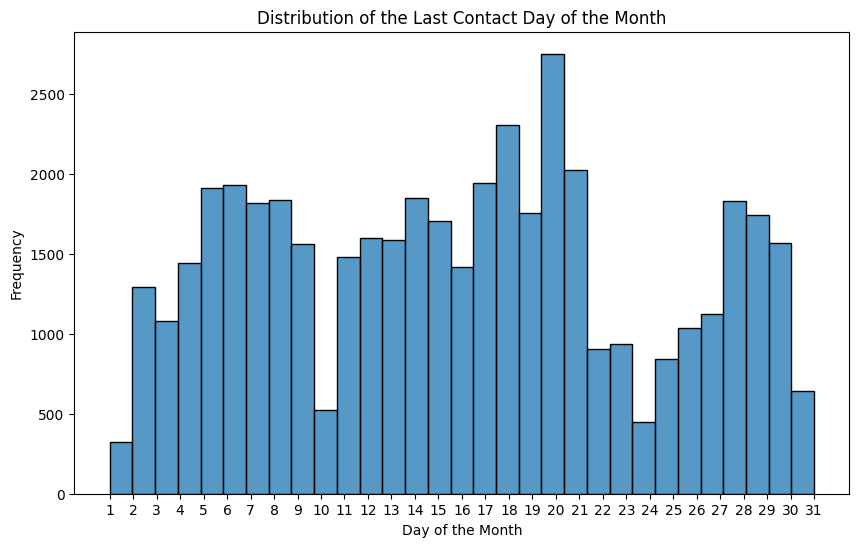

In [845]:
plt.figure(figsize=(10, 6))
sns.histplot(df['day'], kde=False, bins=31, edgecolor='black')
plt.title('Distribution of the Last Contact Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 32))
plt.show()

Plot 11:​
How does the last contact month vary among the clients?​

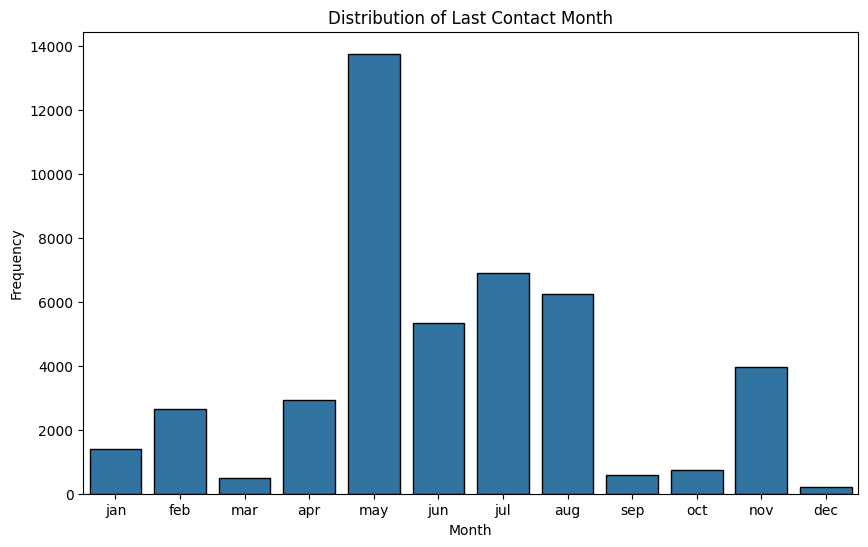

In [846]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], edgecolor = 'black')
plt.title('Distribution of Last Contact Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

Plot 12: What is the distribution of the duration of the last contact?

In [847]:
print(df['duration'].describe())

count    45210.000000
mean       258.155342
std        257.522333
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


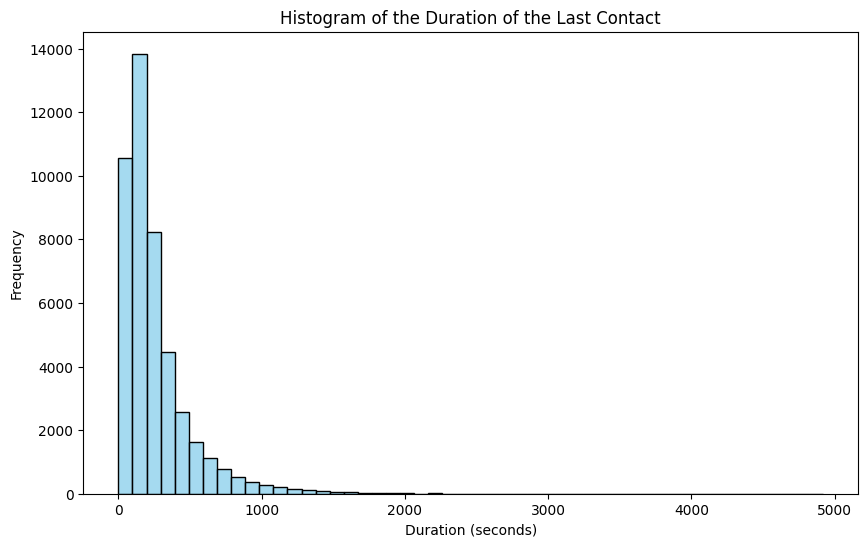

In [848]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, kde=False, color='skyblue',edgecolor='black')
plt.title('Histogram of the Duration of the Last Contact')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

Plot 13: How many contacts were performed during the campaign for each client?​

In [849]:
print(df['campaign'].describe())

count    45210.000000
mean         2.763791
std          3.098059
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


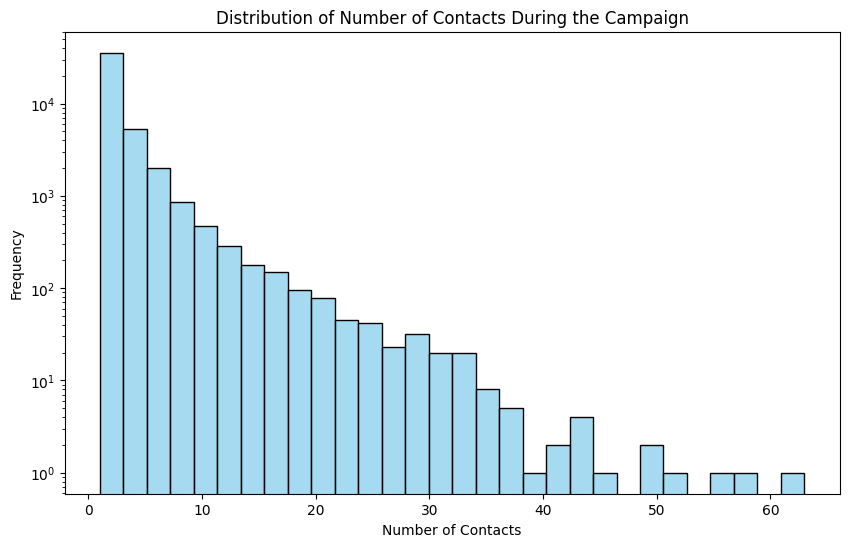

In [850]:
plt.figure(figsize=(10, 6))
sns.histplot(df['campaign'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Contacts During the Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

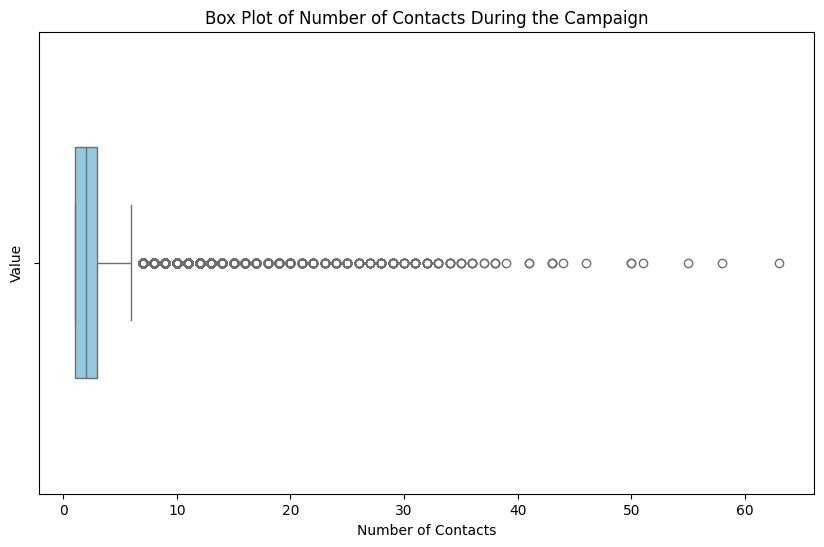

In [851]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='campaign', color='skyblue', width=0.5)
plt.title('Box Plot of Number of Contacts During the Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Value')
plt.show()


Plot 14: What are the outcomes of the previous marketing campaigns?

In [852]:
print(df['pdays'].describe())

count    45210.000000
mean        40.187879
std        100.112791
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


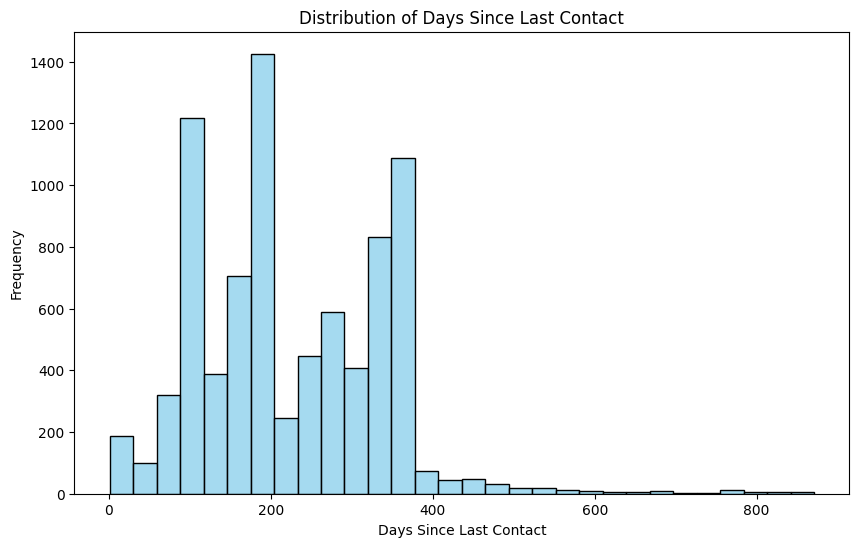

In [853]:
df['pdays'] = df['pdays'].replace(-1, pd.NA)  # Use NaN for better visualization

plt.figure(figsize=(10, 6))
sns.histplot(df['pdays'].dropna(), bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Since Last Contact')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Frequency')
plt.show()

Plot 15: How many contacts were performed before the current campaign for each client?

In [854]:
print(df['previous'].describe())

count    45210.000000
mean         0.580513
std          2.303843
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


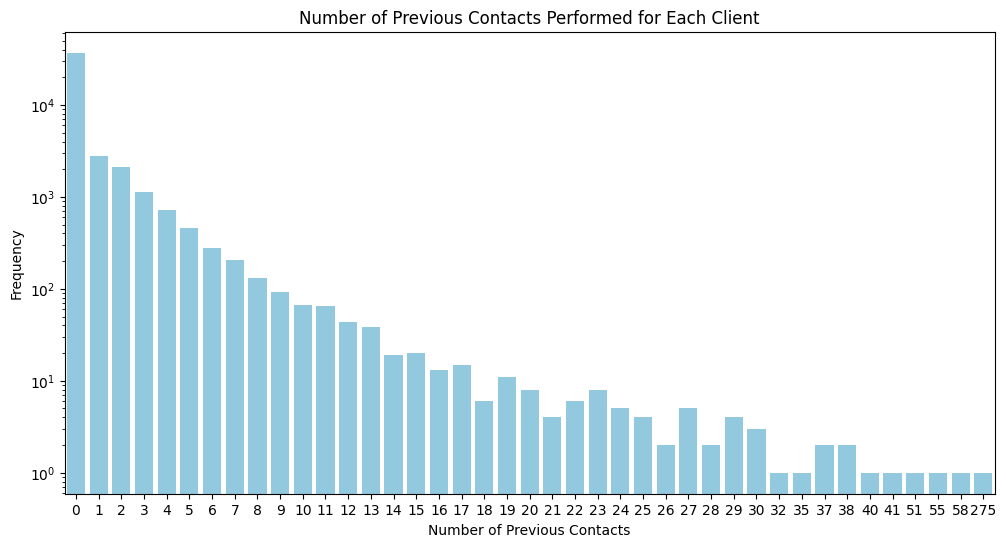

In [855]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='previous', color='skyblue')
plt.title('Number of Previous Contacts Performed for Each Client')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

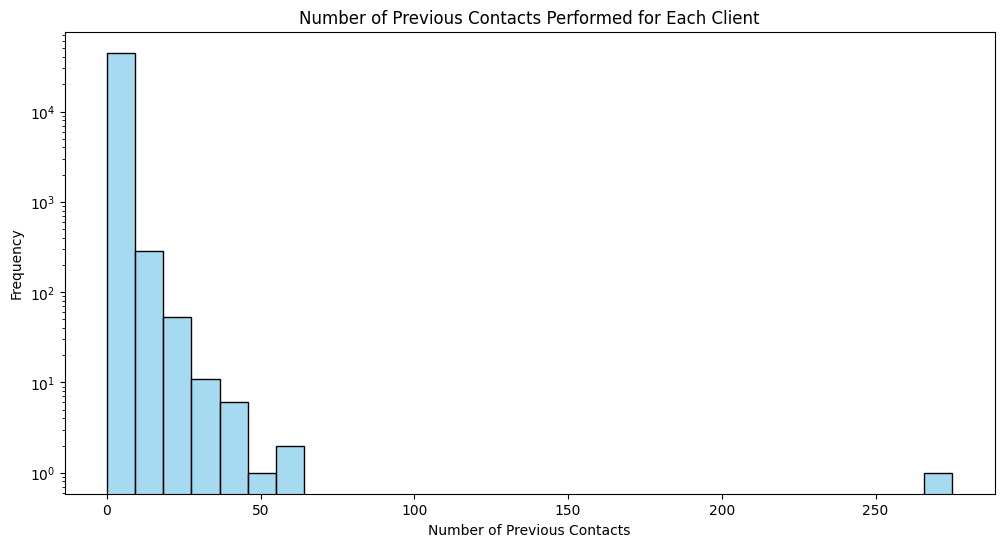

In [856]:
plt.figure(figsize=(12, 6))
sns.histplot(df['previous'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Number of Previous Contacts Performed for Each Client')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

Plot 16:​ What were the outcomes of the previous marketing campaigns?​

In [857]:
print(df['poutcome'].unique())
print(df['poutcome'].value_counts())

['unknown' 'failure' 'other' 'success']
poutcome
unknown    36959
failure     4900
other       1838
success     1513
Name: count, dtype: int64


<ipython-input-858-915cf930b5b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='poutcome', data=df, palette='pastel', order=df['poutcome'].value_counts().index)


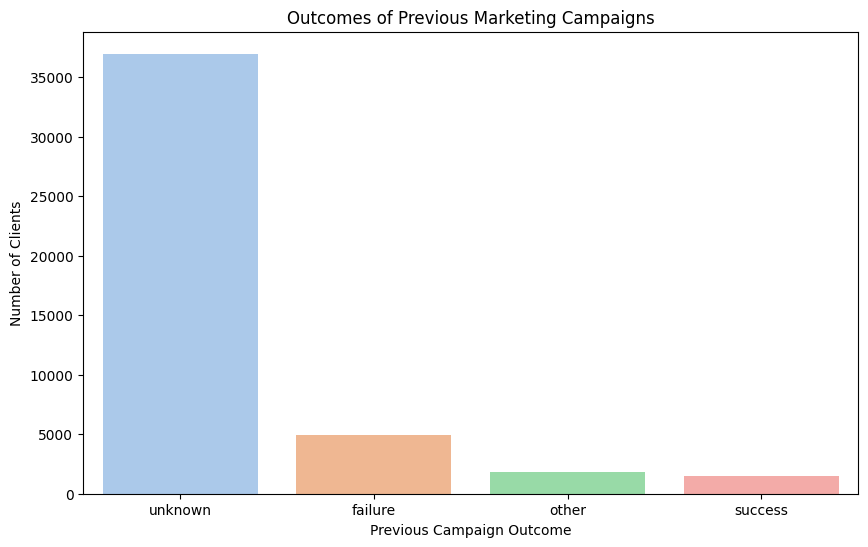

In [858]:
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', data=df, palette='pastel', order=df['poutcome'].value_counts().index)
plt.title('Outcomes of Previous Marketing Campaigns')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Number of Clients')
plt.show()

Plot 17: What is the distribution of clients who subscribed to a term deposit vs. those who did not?

In [859]:
print(df['y'].value_counts())

y
0    39917
1     5293
Name: count, dtype: int64


<ipython-input-860-e95c766dfc40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='muted', order=df['y'].value_counts().index)


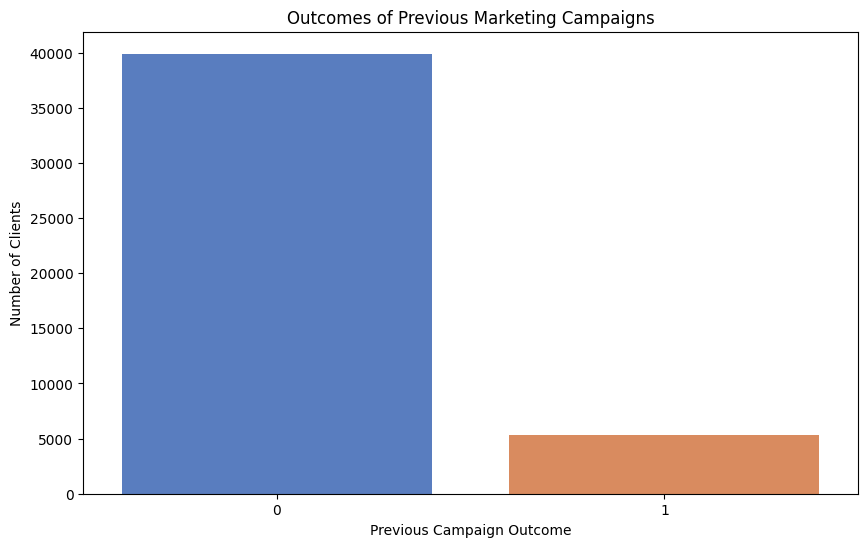

In [860]:
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=df, palette='muted', order=df['y'].value_counts().index)
plt.title('Outcomes of Previous Marketing Campaigns')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Number of Clients')
plt.show()

Plot 18 :

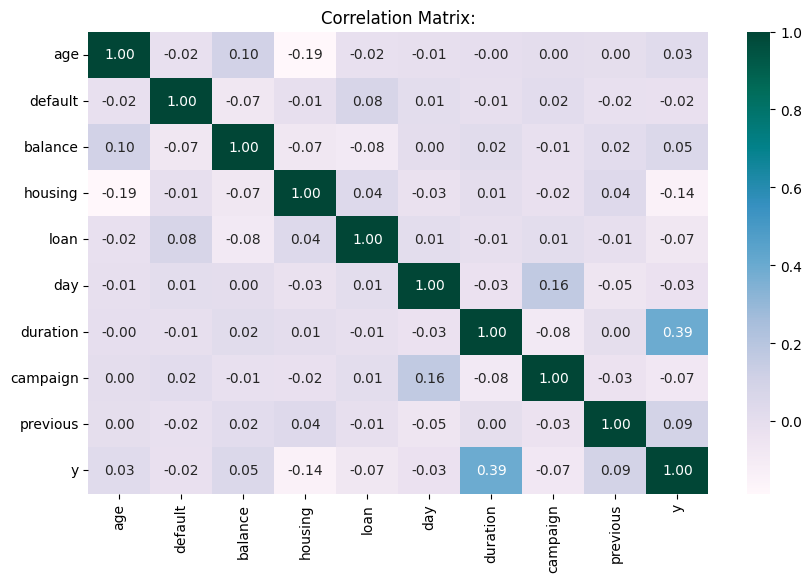

In [861]:
num_df = df.select_dtypes(include = ['int64','float64'])
corr_mat = num_df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_mat, annot = True, cmap = 'PuBuGn', fmt = ".2f")
plt.title("Correlation Matrix:")
plt.show()